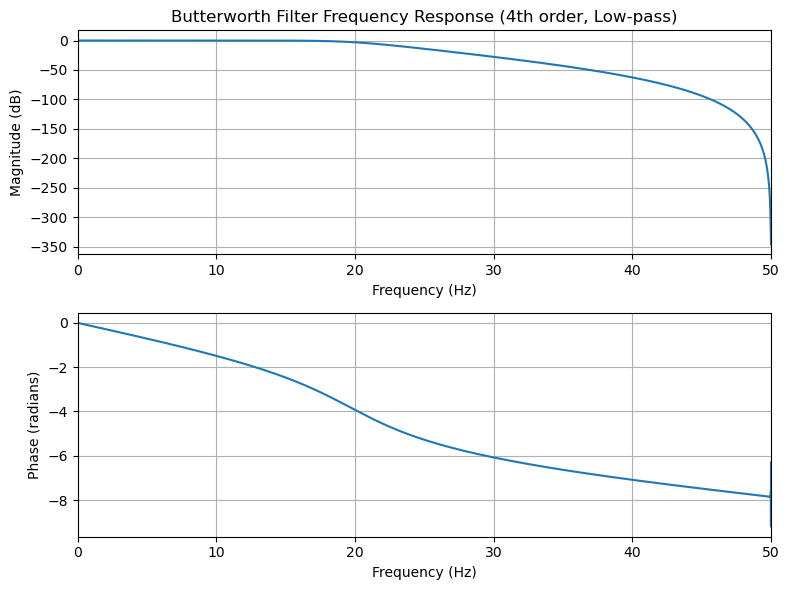

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Butterworth filter specifications
order = 5
cutoff_frequency = 20  # Hz
sampling_frequency = 100  # Assuming a 100 Hz sampling frequency

# Normalize the cutoff frequency (digital frequency)
normalized_cutoff = cutoff_frequency / (0.5 * sampling_frequency)

# Generate the Butterworth filter
b, a = signal.butter(order, normalized_cutoff, btype='low', analog=False)

# Generate the frequency response
w, h = signal.freqz(b, a, worN=8000)

# Plot Bode plot (magnitude and phase)
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Magnitude plot
ax[0].plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)))
ax[0].set_title('Butterworth Filter Frequency Response (4th order, Low-pass)')
ax[0].set_ylabel('Magnitude (dB)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_xlim(0, 50)
ax[0].grid()

# Phase plot
angles = np.unwrap(np.angle(h))
ax[1].plot(0.5 * sampling_frequency * w / np.pi, angles)
ax[1].set_ylabel('Phase (radians)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_xlim(0, 50)
ax[1].grid()

plt.tight_layout()
plt.show()


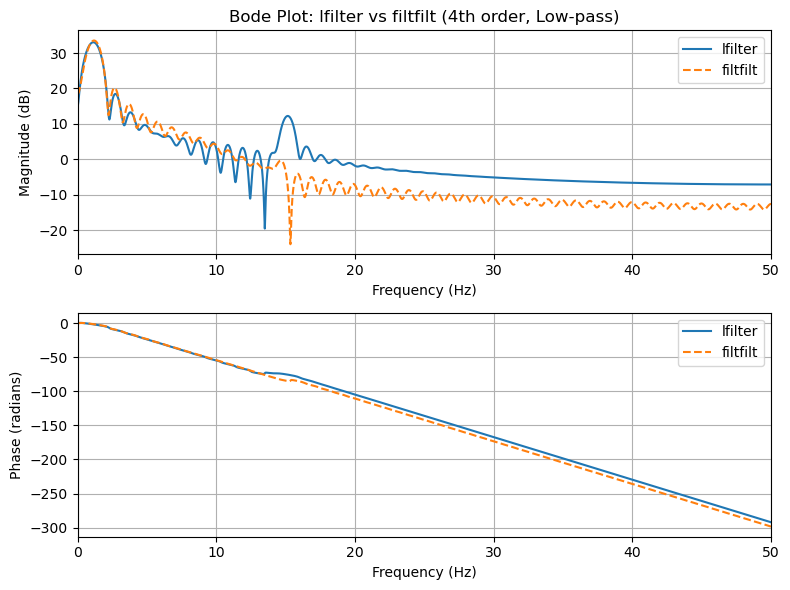

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate sample data for filtering
fs = 100  # Sampling frequency in Hz
t = np.linspace(0, 1.0, fs, endpoint=False)
# Create a signal with two frequencies: one below and one above the cutoff frequency
data = np.sin(1.2 * 2 * np.pi * t) + 0.5 * np.sin(15 * 2 * np.pi * t)

# Define the filter
cutoff_freq = 10  # Hz
nyquist = 0.5 * fs
normal_cutoff = cutoff_freq / nyquist

# Design the Butterworth filter
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)

# Apply filtering using lfilter (without filtfilt)
filtered_data_lfilter = signal.lfilter(b, a, data)

# Apply filtering using filtfilt (zero-phase filtering)
filtered_data_filtfilt = signal.filtfilt(b, a, data)

# Generate frequency response for both filtered signals
w_lfilter, h_lfilter = signal.freqz(filtered_data_lfilter, worN=8000)
w_filtfilt, h_filtfilt = signal.freqz(filtered_data_filtfilt, worN=8000)

# Plot the Bode plot for both filtered signals
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Magnitude plot for lfilter
ax[0].plot(0.5 * fs * w_lfilter / np.pi, 20 * np.log10(abs(h_lfilter)), label='lfilter')
ax[0].plot(0.5 * fs * w_filtfilt / np.pi, 20 * np.log10(abs(h_filtfilt)), label='filtfilt', linestyle='--')
ax[0].set_title('Bode Plot: lfilter vs filtfilt (4th order, Low-pass)')
ax[0].set_ylabel('Magnitude (dB)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_xlim(0, 50)
ax[0].legend()
ax[0].grid()

# Phase plot for lfilter and filtfilt
angles_lfilter = np.unwrap(np.angle(h_lfilter))
angles_filtfilt = np.unwrap(np.angle(h_filtfilt))

ax[1].plot(0.5 * fs * w_lfilter / np.pi, angles_lfilter, label='lfilter')
ax[1].plot(0.5 * fs * w_filtfilt / np.pi, angles_filtfilt, label='filtfilt', linestyle='--')
ax[1].set_ylabel('Phase (radians)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_xlim(0, 50)
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()
